In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import data as dt
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12560\578697102.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv(r"C:\Users\lenovo\Downloads\My Uber Drives - 2016.csv")

In [3]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
df.duplicated().sum()

1

In [5]:
df.drop_duplicates(inplace = True ,ignore_index = True)

In [6]:
df.isna().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [7]:
l = [i for i in df.columns if (df[i].isna().sum()) < 10 ]
df.dropna(subset = l,inplace =True )

In [8]:
df['PURPOSE*'].mode()

0    Meeting
Name: PURPOSE*, dtype: object

In [9]:
df[df['CATEGORY*'] == 'Business']['PURPOSE*'].mode()

0    Meeting
Name: PURPOSE*, dtype: object

In [10]:
df[df['CATEGORY*'] == 'Personal']['PURPOSE*'].mode()

0    Moving
Name: PURPOSE*, dtype: object

In [11]:
# Fill NaN values in the 'PURPOSE*' column based on the 'CATEGORY*' column
df.loc[df['CATEGORY*'] == 'Business', 'PURPOSE*'] = df.loc[df['CATEGORY*'] == 'Business', 'PURPOSE*'].fillna('Meeting')
df.loc[df['CATEGORY*'] == 'Personal', 'PURPOSE*'] = df.loc[df['CATEGORY*'] == 'Personal', 'PURPOSE*'].fillna('Moving')


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1154 entries, 0 to 1153
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1154 non-null   object 
 1   END_DATE*    1154 non-null   object 
 2   CATEGORY*    1154 non-null   object 
 3   START*       1154 non-null   object 
 4   STOP*        1154 non-null   object 
 5   MILES*       1154 non-null   float64
 6   PURPOSE*     1154 non-null   object 
dtypes: float64(1), object(6)
memory usage: 72.1+ KB


## columns datatype
-  Numeric columns 
   - Miles 
- categorial 
  - PURPOSE* , CATEGORY*
- Mixed columns
  -  start , end, End date , start date

In [13]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,Meeting
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


## Miles 
conclusion
-  There are so many outlier in the data.its not valid outiler so i have remove all the outlier  in the data
-  75 % peoples are travell on under 9 miles
- data is higly positive skewed 
-  There no missing values are availble

Discribe Five number summary in MILES* columns: count    1154.000000
mean       10.567418
std        21.588452
min         0.500000
25%         2.900000
50%         6.000000
75%        10.400000
max       310.300000
Name: MILES*, dtype: float64
data Skwness: 7.218779471596945
variance in this data: 466.06127918879395
Axes(0.125,0.53;0.352273x0.35)
Axes(0.547727,0.53;0.352273x0.35)
Axes(0.125,0.11;0.352273x0.35)


C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



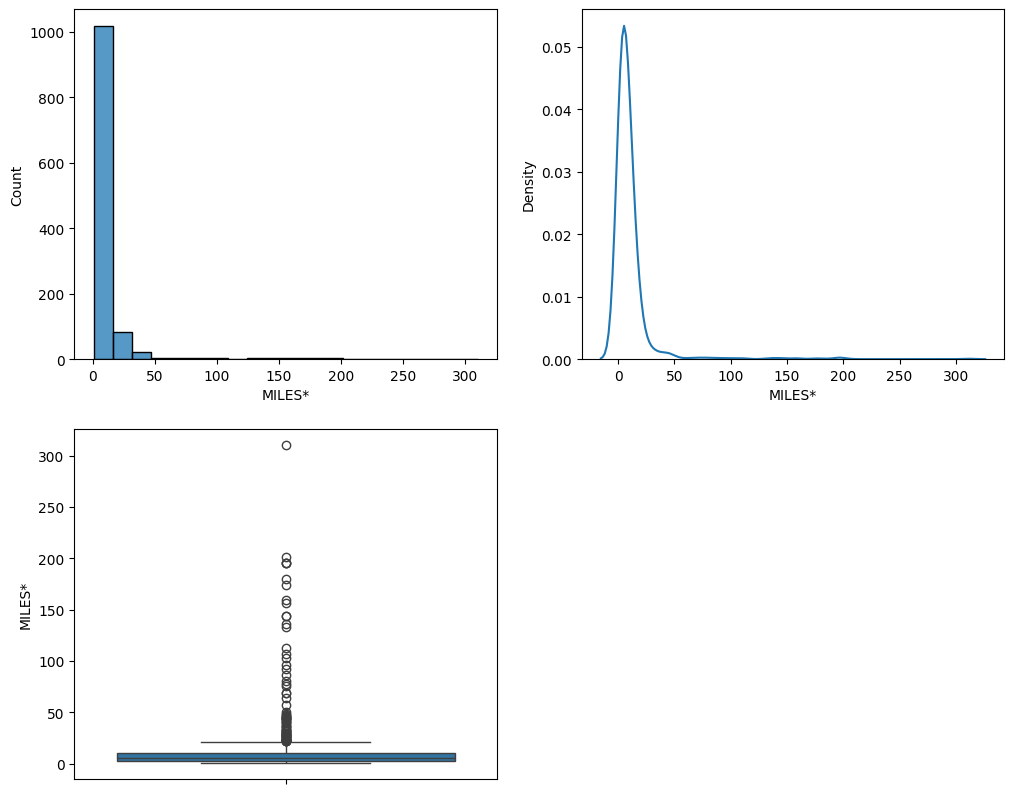

In [14]:
dt.single(df,'MILES*')

In [15]:
dt.find_outlier(df,'MILES*')

Total Iqr 7.5
Lower Boundry: -8.35
upper boundry: 21.65
6.672443674176777%tile outlier in this data(positive)
0.0%tile outlier in this data(negetive)


- After remove the outlier in the data
  - data is almost normally distributed 
  - there few outlier 

In [16]:
df = dt.remove_outlier(df,'MILES*')

Discribe Five number summary in MILES* columns: count    1077.000000
mean        6.599721
std         4.698241
min         0.500000
25%         2.700000
50%         5.500000
75%         9.800000
max        21.400000
Name: MILES*, dtype: float64
data Skwness: 0.8745878469508785
variance in this data: 22.07346646508786
Axes(0.125,0.53;0.352273x0.35)
Axes(0.547727,0.53;0.352273x0.35)
Axes(0.125,0.11;0.352273x0.35)


C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



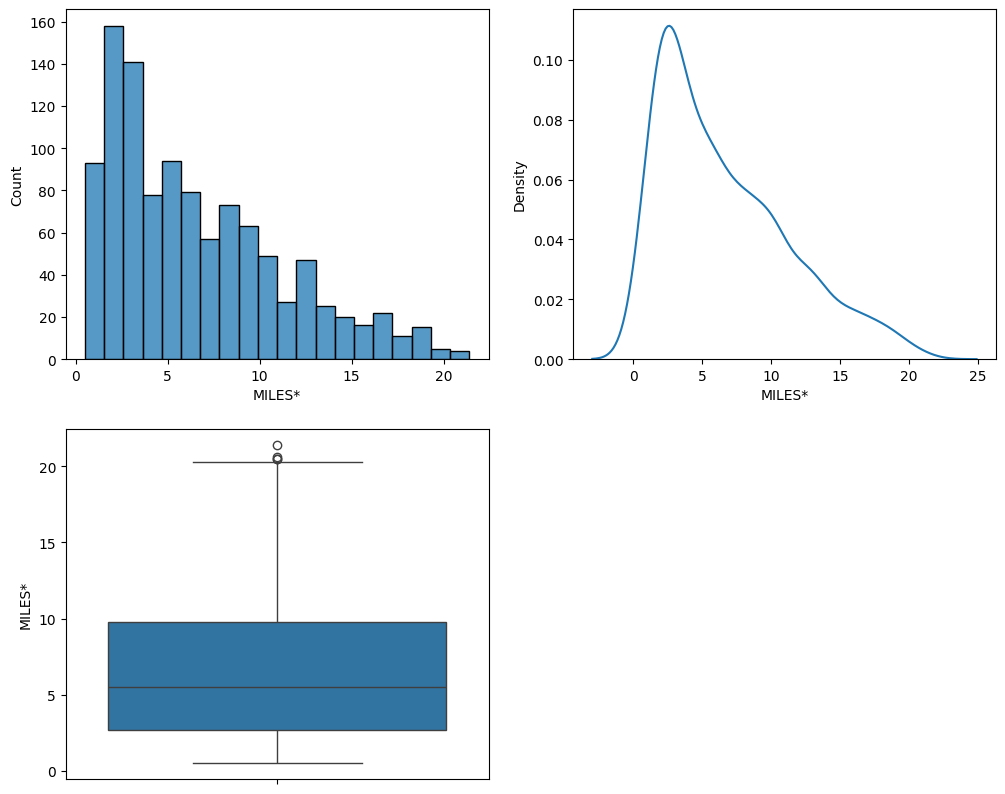

In [17]:
dt.single(df,'MILES*')

## categorical columns


   

## CATEGORY*
conclusion
 - There are two category in the columns 
 -  mostly customers are using uber on busness pursose more than 90 % people are used user taxi


CATEGORY*
Business    1008
Personal      69
Name: count, dtype: int64


C:\Users\lenovo\Desktop\jupyter\data.py:56: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



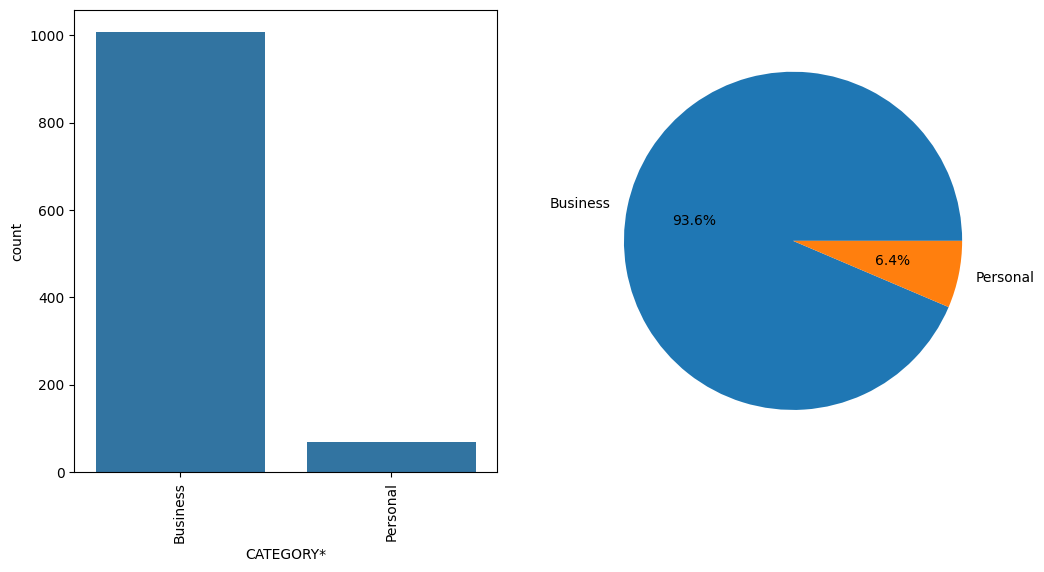

In [18]:
dt.cate(df,'CATEGORY*')

##  Purpose
conclusion
- There are customers are highly use use meeting purpose is 50% more getting taxi for metting purpose

PURPOSE*
Meeting            577
Meal/Entertain     156
Errand/Supplies    127
Customer Visit      82
Moving              68
Temporary Site      46
Between Offices     17
Airport/Travel       3
Charity ($)          1
Name: count, dtype: int64


C:\Users\lenovo\Desktop\jupyter\data.py:56: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



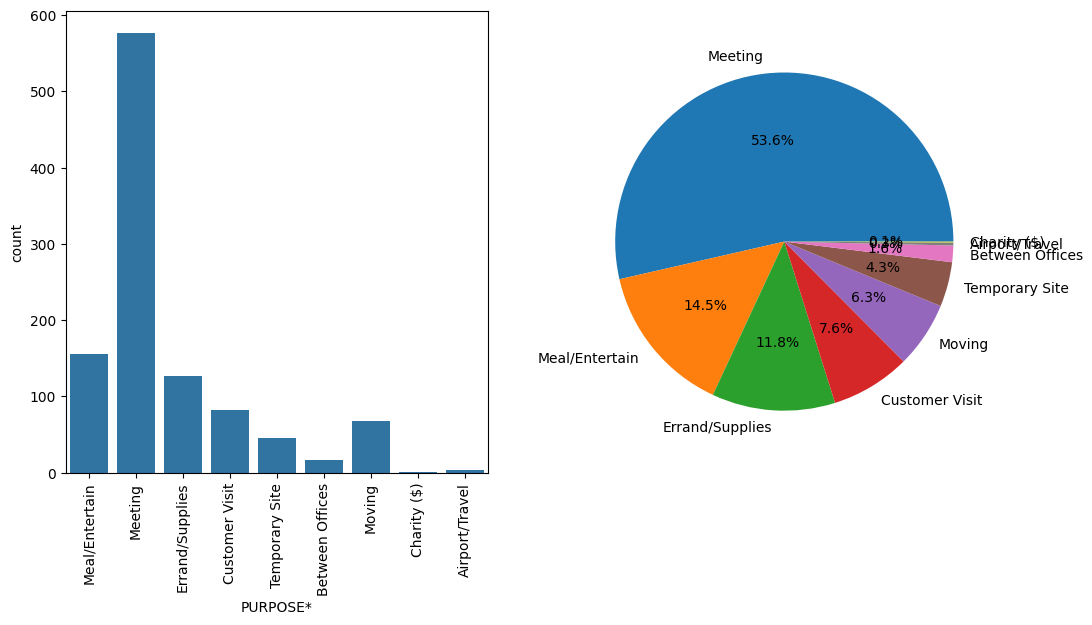

In [19]:
dt.cate(df,'PURPOSE*')

# Feature engineering 

In [20]:
def new(row):
    if row['START*'] == row['STOP*']:
        return 'return trip'
    else:
        return 'one-way trip'

df['TripType'] = df.apply(new, axis=1)

In [21]:
def nw_km(data):
    d = data * 1.609344
    if d < 10: return 'under 10 km'
    elif d >= 10 and d < 25:  return '10-25'
    elif d >= 25 and d <= 40: return '25-40'
    elif d > 40: 'above 40'
df['km'] = df['MILES*'].apply(nw_km)

In [22]:
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'])
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'])

df['Trip Duration'] = (df['END_DATE*'] - df['START_DATE*']).dt.total_seconds() / 60  


In [23]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,TripType,km,Trip Duration
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,return trip,under 10 km,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meeting,return trip,under 10 km,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,return trip,under 10 km,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,return trip,under 10 km,14.0
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,return trip,under 10 km,4.0


## trip Duration 
conclusion
-  there are so many outlier
-  data is highly(positive) skewed


Discribe Five number summary in Trip Duration columns: count    1077.000000
mean       18.898793
std        15.087599
min         0.000000
25%        10.000000
50%        16.000000
75%        24.000000
max       167.000000
Name: Trip Duration, dtype: float64
data Skwness: 3.689471696774698
variance in this data: 227.63565839296132
Axes(0.125,0.53;0.352273x0.35)
Axes(0.547727,0.53;0.352273x0.35)


C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



Axes(0.125,0.11;0.352273x0.35)


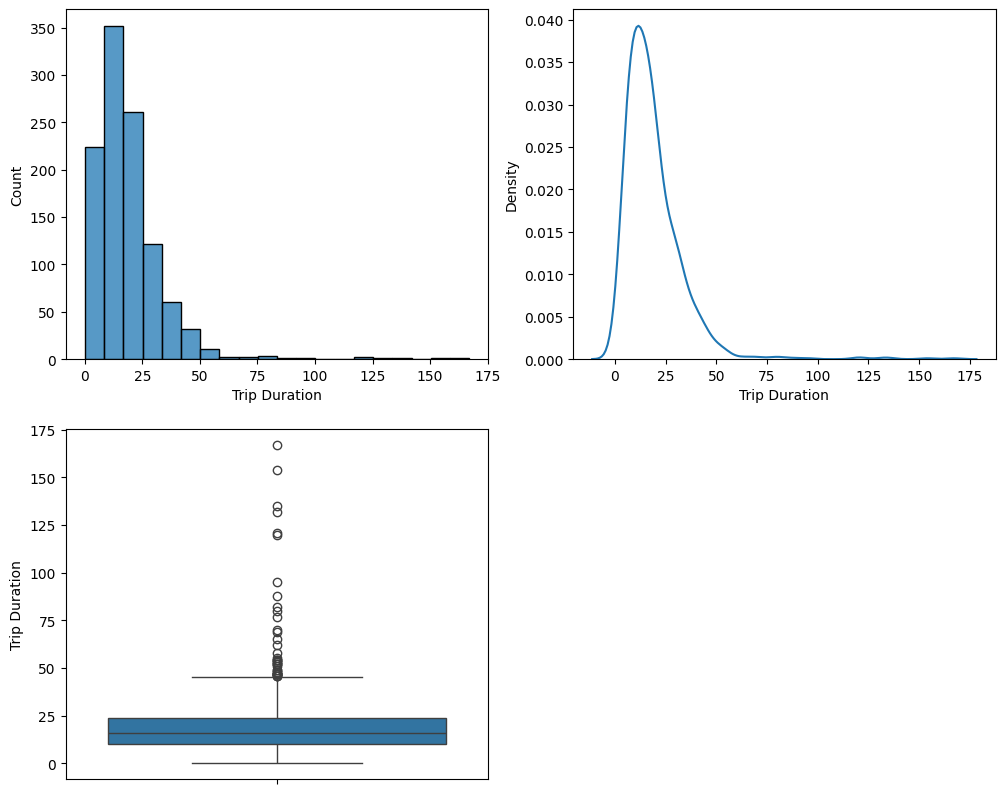

In [24]:
dt.single(df,'Trip Duration')

In [25]:
dt.find_outlier(df,'Trip Duration')

Total Iqr 14.0
Lower Boundry: -11.0
upper boundry: 45.0
3.6211699164345403%tile outlier in this data(positive)
0.0%tile outlier in this data(negetive)


In [26]:
df = dt.remove_outlier(df,'Trip Duration')

## After removing outlier in the data 
conclusion 
-  there no outlier
- all data in under upper limit 
- data is almost normal distributed

Discribe Five number summary in Trip Duration columns: count    1037.000000
mean       16.962392
std         9.769621
min         0.000000
25%         9.000000
50%        15.000000
75%        23.000000
max        44.000000
Name: Trip Duration, dtype: float64
data Skwness: 0.7379050918991806
variance in this data: 95.44549543344144
Axes(0.125,0.53;0.352273x0.35)
Axes(0.547727,0.53;0.352273x0.35)
Axes(0.125,0.11;0.352273x0.35)


C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



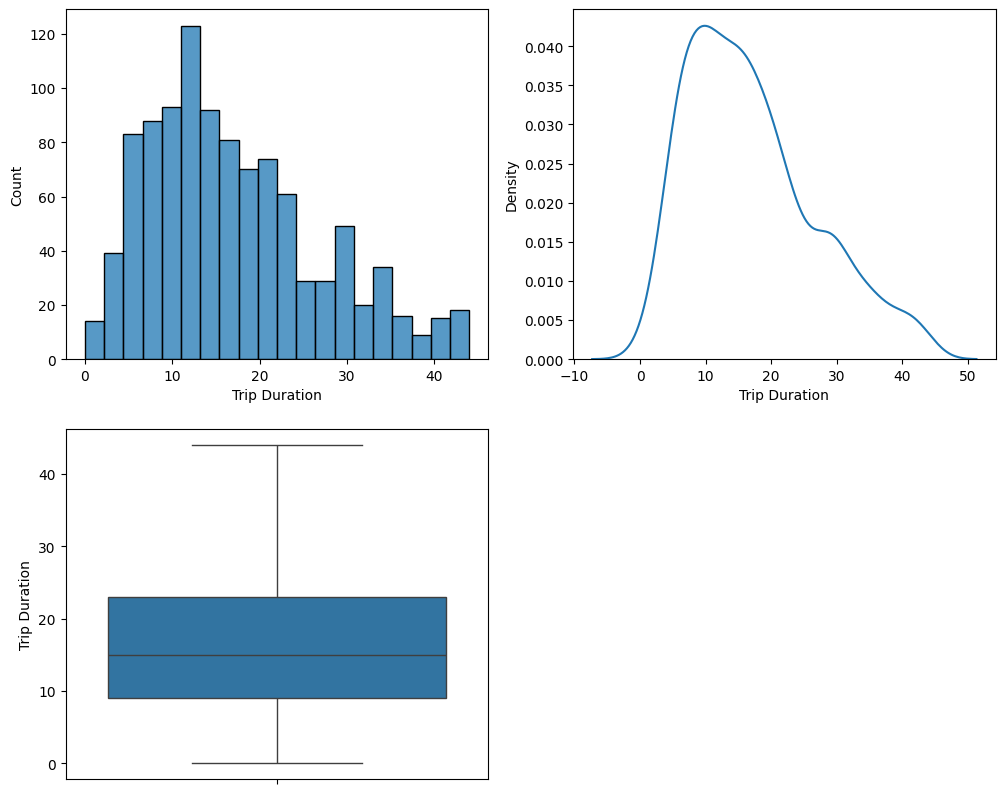

In [27]:
dt.single(df,'Trip Duration')

## trip duration  to category
conlusion

In [28]:
def new(row):
    if row['START*'] == row['STOP*']:
        return row['START*']
    else:
        return row['START*']

df['City'] = df.apply(new, axis=1)

# city values
conclusion 
-  there concate the two columns is start and stop city check which city are highly used in uber texi
-  Cary is highly uber texi using city

In [29]:
d = df['City'].value_counts().reset_index().head(20)


In [30]:
trace = go.Bar(x = d['City'],y=d['count'])
data=[trace]
layout = go.Layout(title= 'Top 20 Cities',
                  xaxis = {'title':'city Name'},
                  yaxis = {'title':'No OF Taxi Pickup'})
fig = go.Figure(data = data,layout = layout)
pyo.plot(fig)

'temp-plot.html'

In [31]:
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,TripType,km,Trip Duration,City
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,return trip,under 10 km,6.0,Fort Pierce
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meeting,return trip,under 10 km,12.0,Fort Pierce
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,return trip,under 10 km,13.0,Fort Pierce
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,return trip,under 10 km,14.0,Fort Pierce
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,return trip,under 10 km,4.0,West Palm Beach
...,...,...,...,...,...,...,...,...,...,...,...
1148,2016-12-30 23:06:00,2016-12-30 23:10:00,Business,Kar?chi,Kar?chi,0.8,Customer Visit,return trip,under 10 km,4.0,Kar?chi
1149,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,return trip,under 10 km,7.0,Kar?chi
1150,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,one-way trip,under 10 km,18.0,Kar?chi
1151,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,return trip,25-40,35.0,Unknown Location


In [32]:
df['PURPOSE*'].unique()

array(['Meal/Entertain', 'Meeting', 'Errand/Supplies', 'Customer Visit',
       'Temporary Site', 'Between Offices', 'Moving', 'Charity ($)',
       'Airport/Travel'], dtype=object)

## trip duration to km
conclusion
- These top 10 cities are highly running average on uber taxi
- mostly runing comes from these cities

In [37]:
d = df.groupby('City')['MILES*'].mean().reset_index().sort_values(by = 'MILES*',ascending = False).head(10)
trace = go.Bar(x = d['City'],y=d['MILES*'])
data=[trace]
layout = go.Layout(title= 'Top 10 Cities',
                  xaxis = {'title':'city Name'},
                  yaxis = {'title':'Average Runing on each city'})
fig = go.Figure(data = data,layout = layout)
pyo.plot(fig)
d

,City,MILES*
139,Sunnyvale,17.6
17,Chapel Hill,17.0
3,Arabi,17.0
62,Jamaica,16.5
48,Fuquay-Varina,15.6
1,Almond,15.2
84,Mcvan,14.5
126,Seattle,14.2
79,Long Island City,13.9
55,Holly Springs,13.5


# miles to trip duration
conclusion 
- there see commanly less distance to to taking less time


In [34]:
d1 = df.groupby('km')['Trip Duration'].mean().reset_index()

In [35]:
trace = go.Bar(x = d1['km'],y= d1['Trip Duration'])
layout = go.Layout(title= 'Time Duration',
                  xaxis = {'title':'KILO METER'},
                  yaxis = {'title':'Average Time on distance'})
fig = go.Figure(data = [trace],layout = layout)

pyo.plot(fig)
d1

,km,Trip Duration
0,10-25,23.742627
1,25-40,31.300000
2,under 10 km,11.675896


<Axes: >

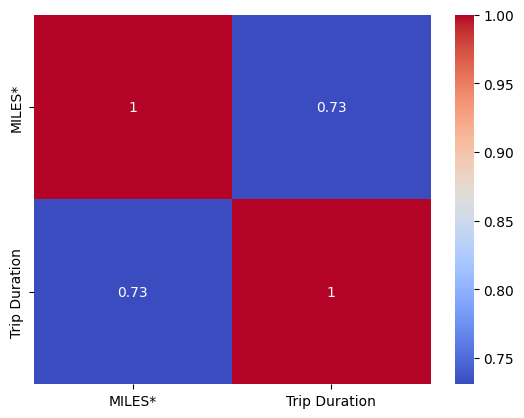

In [36]:
sns.heatmap(df.corr(numeric_only = True),annot= True,cmap = 'coolwarm')

## Start -  Stop Trip 
conslusion
-  there are people are more travelling distance.other take less time 

In [63]:
d = df.groupby(['START*','STOP*'])[['MILES*','Trip Duration']].mean().reset_index().sort_values(by = 'MILES*',ascending = False).head(10)
d['Trip'] = d['START*']+' '+d['STOP*']
d.drop(columns = ['START*','STOP*'],axis = 1,inplace = True)

trace = go.Bar(x = d['Trip'],y=d['MILES*'],name = 'MILES')
trace1 = go.Bar(x = d['Trip'],y=d['Trip Duration'],name = 'Time Duration')
data=[trace,trace1]
layout = go.Layout(title= 'Top 10 Cities',
                  xaxis = {'title':'city Name'},
                  yaxis = {'title':'Average Runing and Time Duration on each city '})
fig = go.Figure(data = data,layout = layout)
pyo.plot(fig)
d

,MILES*,Trip Duration,Trip
49,21.4,44.0,Colombo Katunayaka
225,20.5,27.0,San Francisco Palo Alto
30,19.4,40.0,Cary Chapel Hill
253,17.6,24.0,Sunnyvale Newark
44,17.0,14.0,Chapel Hill Morrisville
8,17.0,28.0,Arabi Metairie
120,16.5,27.0,Jamaica New York
32,15.6,33.0,Cary Fuquay-Varina
96,15.6,36.0,Fuquay-Varina Cary
161,15.5,42.0,Midtown Alief


In [64]:
 df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,TripType,km,Trip Duration,City
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,return trip,under 10 km,6.0,Fort Pierce
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meeting,return trip,under 10 km,12.0,Fort Pierce
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,return trip,under 10 km,13.0,Fort Pierce
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,return trip,under 10 km,14.0,Fort Pierce
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,return trip,under 10 km,4.0,West Palm Beach


## trip type
conclusion 
- there are mostly people are taking  single trip more than 50% ratio of single trip 

In [75]:
g = df['TripType'].value_counts().reset_index()
trace = go.Bar(x = g['TripType'],y = g['count'] )
data = [trace]
layout = go.Layout(title = 'Trip Type'
                  ,xaxis= {'title': 'Trip Type'},
                  yaxis = {"title":'count'})
fig = go.Figure(data= data,layout = layout)
pyo.plot(fig)
g

,TripType,count
0,one-way trip,776
1,return trip,261


In [76]:
pd.crosstab(df['PURPOSE*'],df['km'])

km,10-25,25-40,under 10 km
PURPOSE*,,,
Airport/Travel,1,0,2
Between Offices,8,1,7
Charity ($),1,0,0
Customer Visit,36,7,36
Errand/Supplies,14,1,110
Meal/Entertain,39,3,112
Meeting,231,35,281
Moving,15,0,52
Temporary Site,28,3,14


## Puprose to km
conclusion
- there are 66% people airport under 10 and left people is around travell 33%
- Errand/ supplies pupose is highly travell on under 10 km
- mostly peoples are travell under the 10 km and 10-25 km 

km                    10-25     25-40  under 10 km
PURPOSE*                                          
Airport/Travel    33.333333  0.000000    66.666667
Between Offices   50.000000  6.250000    43.750000
Charity ($)      100.000000  0.000000     0.000000
Customer Visit    45.569620  8.860759    45.569620
Errand/Supplies   11.200000  0.800000    88.000000
Meal/Entertain    25.324675  1.948052    72.727273
Meeting           42.230347  6.398537    51.371115
Moving            22.388060  0.000000    77.611940
Temporary Site    62.222222  6.666667    31.111111


C:\Users\lenovo\Desktop\jupyter\data.py:72: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\lenovo\Desktop\jupyter\data.py:77: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



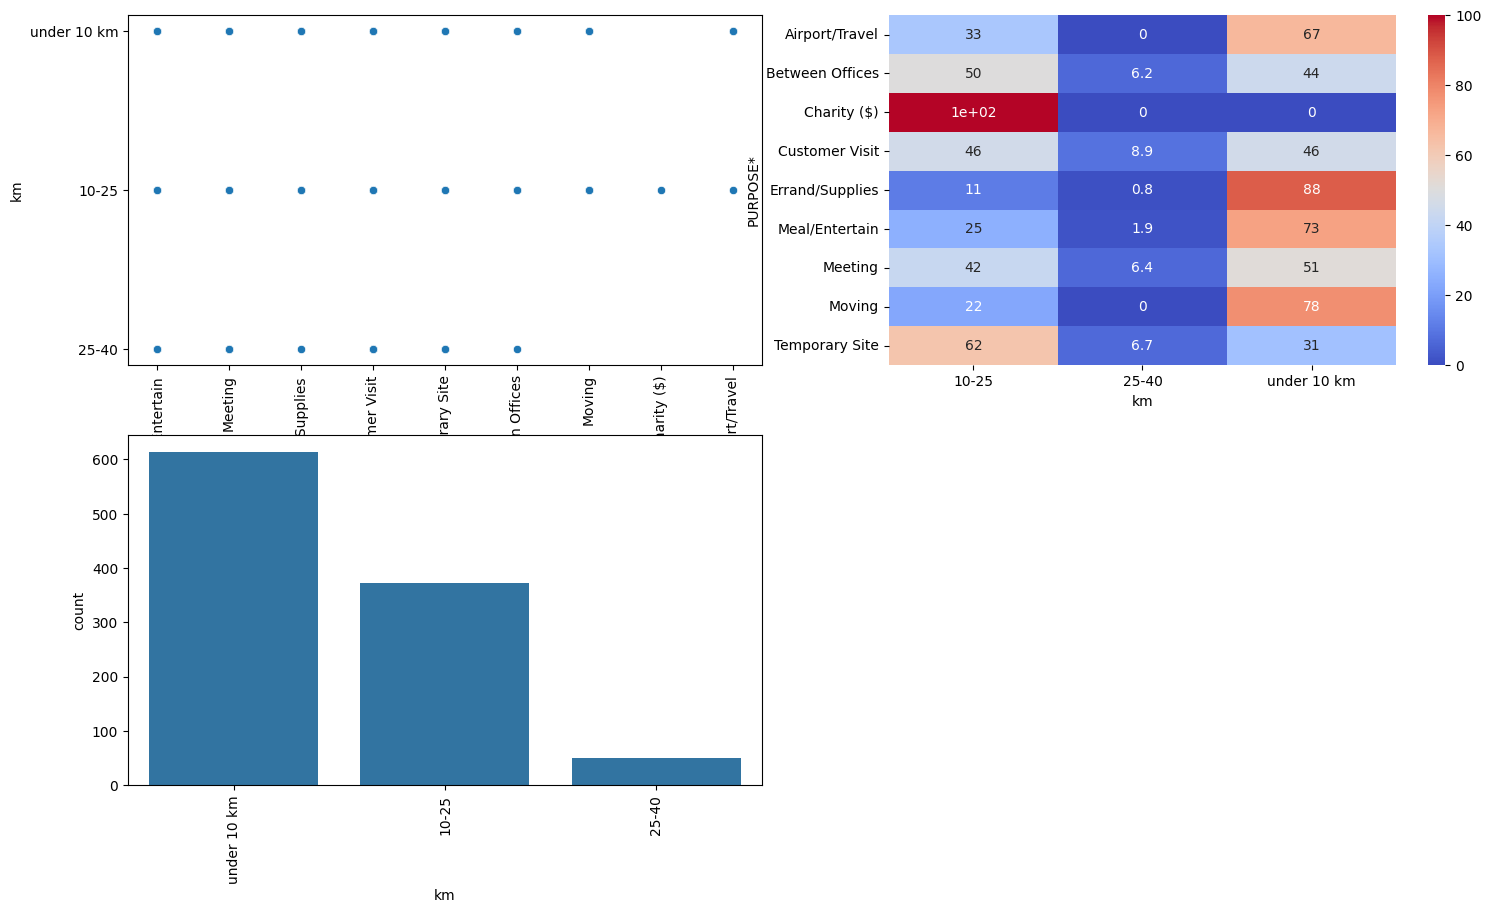

In [79]:
dt.bia(df,'PURPOSE*','km')